 # 손글씨 이미지를 제대로 0~9까지 열가지 카테고리로 분류해보기

## 1) import module

In [92]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Data 전처리

## 2) 데이터 준비

In [93]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [94]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## 3) 데이터 이해하기
* Feature Data 지정하기

* Label Data 지정하기

* Target Names 출력해 보기

* 데이터 Describe 해 보기

In [95]:
x = digits.data
x.shape # (1797,64)
# feature data : 8*8 픽셀의 숫자 손글씨 데이터


(1797, 64)

In [96]:
y = digits.target
y.shape # (1798,) 
# label = 0~9 까지 분류한 것


(1797,)

In [97]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
images = digits.images
images.shape
# 8*8 픽셀의 숫자 손글씨 이미지 데이터 


(1797, 8, 8)

label:  8


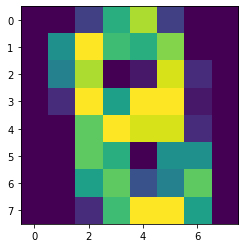

In [99]:
import matplotlib.pyplot as plt
plt.imshow(images[500])
print('label: ', y[500])

In [100]:
digits.DESCR
# 너무 중구난방이라 뭐라 써져있는 지도 모르겠음

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [101]:
print(digits.DESCR)
# 이렇게 하면 더 이쁘게 나오겠죠?

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 4) train, test 데이터 분리

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 7, test_size=0.3)

In [103]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## 5) 다양한 모델로 학습시켜보기

* Decision Tree 사용해 보기

* Random Forest 사용해 보기

* SVM 사용해 보기

* SGD Classifier 사용해 보기

* Logistic Regression 사용해 보기


## 6) 모델 성능 평가 

### (1) Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
dt = DecisionTreeClassifier(random_state=32)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

# y_pred.shape, y_test.shape

In [105]:
# evaluate Model
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test,y_pred)
print("accuracy_dt : {}".format(accuracy_dt))

accuracy_dt : 0.85


In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[59,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0, 46,  2,  1,  0,  0,  0,  0,  1,  5],
       [ 0,  2, 49,  1,  0,  0,  0,  1,  0,  0],
       [ 3,  2,  2, 40,  0,  2,  0,  2,  1,  0],
       [ 0,  3,  0,  1, 50,  0,  0,  3,  1,  0],
       [ 0,  1,  0,  1,  0, 45,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  0, 46,  0,  0,  0],
       [ 0,  3,  1,  2,  3,  0,  0, 38,  0,  2],
       [ 0,  5,  4,  6,  0,  2,  0,  0, 43,  2],
       [ 0,  0,  0,  5,  1,  2,  0,  3,  0, 43]])

In [107]:
from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))
dtr = classification_report(y_test, y_pred)
print(dtr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.73      0.84      0.78        55
           2       0.84      0.92      0.88        53
           3       0.70      0.77      0.73        52
           4       0.91      0.86      0.88        58
           5       0.88      0.94      0.91        48
           6       1.00      0.96      0.98        48
           7       0.78      0.78      0.78        49
           8       0.93      0.69      0.80        62
           9       0.81      0.80      0.80        54

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540



### (2) Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test,y_pred)
print("accuracy_rf: {}".format(accuracy_rf))

accuracy_rf: 0.9666666666666667


In [109]:
from sklearn.metrics import classification_report
rfr = classification_report(y_test, y_pred)
print(rfr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00        53
           3       0.96      0.96      0.96        52
           4       0.93      0.98      0.96        58
           5       0.92      1.00      0.96        48
           6       1.00      0.98      0.99        48
           7       0.92      0.98      0.95        49
           8       1.00      0.90      0.95        62
           9       1.00      0.91      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### (3) SVM

In [110]:
from sklearn import svm
svc = svm.SVC()
# https://scikit-learn.org/stable/modules/svm.html#classification 여기서 보면 멀티클래서에선 svm.SVC 쓴다고 나옴
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred)
print("accuracy_svc: {}".format(accuracy_svc))

accuracy_svc: 0.9907407407407407


In [111]:
from sklearn.metrics import classification_report
svmr = classification_report(y_test, y_pred)
print(svmr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        52
           4       0.98      1.00      0.99        58
           5       0.98      1.00      0.99        48
           6       1.00      1.00      1.00        48
           7       0.98      1.00      0.99        49
           8       1.00      0.95      0.98        62
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### (4) SGD classifier

In [112]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy_sgd = accuracy_score(y_test,y_pred)
print("accuracy_sgd: {}".format(accuracy_sgd))

accuracy_sgd: 0.9462962962962963


In [113]:
from sklearn.metrics import classification_report

sgdr = classification_report(y_test, y_pred)
print(sgdr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.85      0.96      0.91        55
           2       0.98      1.00      0.99        53
           3       0.96      0.96      0.96        52
           4       0.96      0.91      0.94        58
           5       0.94      1.00      0.97        48
           6       0.91      1.00      0.95        48
           7       0.96      0.98      0.97        49
           8       0.93      0.84      0.88        62
           9       0.98      0.85      0.91        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.85      0.96      0.91        55
           2       0.98      1.00      0.99        53
           3       0.96      0.96      0.96        52
           4       0.96      0.91      0.94        58
           5       0.94      1.00      0.97        48
           6       0.91      1.00      0.95        48
           7       0.96      0.98      0.97        49
           8       0.93      0.84      0.88        62
           9       0.98      0.85      0.91        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



### (5) Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
lrg=LogisticRegression()
lrg.fit(x_train,y_train)
y_pred = lrg.predict(x_test)
accuracy_lrg = accuracy_score(y_test,y_pred)
print("accuracy_lrg: {}".format(accuracy_lrg))

accuracy_lrg: 0.95


/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
# 에러가 떠서 다시 해보겠다
# https://scikit-learn.org/stable/modules/preprocessing.html 이거 보고 다시 시도

from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler()

In [117]:
x_scaled = scaler.transform(x_train)
x_train=x_scaled

from sklearn.linear_model import LogisticRegression
lrg=LogisticRegression(random_state=42,max_iter = 3000) # 여기서 파라미터 몇 개 추가함
lrg.fit(x_train,y_train)
y_pred = lrg.predict(x_test)
accuracy_lrg = accuracy_score(y_test,y_pred)
print("accuracy_lrg: {}".format(accuracy_lrg))

accuracy_lrg: 0.8111111111111111


In [118]:
from sklearn.metrics import classification_report

lrr = classification_report(y_test, y_pred) 
print(lrr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.53      0.96      0.68        55
           2       1.00      0.85      0.92        53
           3       1.00      0.81      0.89        52
           4       1.00      0.28      0.43        58
           5       1.00      0.83      0.91        48
           6       0.88      0.96      0.92        48
           7       1.00      0.65      0.79        49
           8       0.78      0.87      0.82        62
           9       0.60      0.96      0.74        54

    accuracy                           0.81       540
   macro avg       0.88      0.81      0.81       540
weighted avg       0.88      0.81      0.81       540



# 여기에선 svm이 99퍼로 승리!
그리고 여기서 recalll이나 precision이나 f1-score 거의 비슷하거나 아예 같아서 값을 비교하는게 무의미한 것 같다.

In [119]:
print('Decision Tree:{}'.format(dtr)) # 전체 라벨로 봤을 때 f1-score가 불균형함
print('Random Forest:{}'.format(rfr)) # f1-score도 전체적으로 고름
print('SVM:{}'.format(svmr)) # 말할 필요 없이 99퍼의 확률
print('SGD:{}'.format(sgdr)) # 전반적으로 고르지 않음
print('Logistic Regressor: {}'.format(lrr)) # 수치들이 불균형하며 정확도도 낮음

Decision Tree:              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.73      0.84      0.78        55
           2       0.84      0.92      0.88        53
           3       0.70      0.77      0.73        52
           4       0.91      0.86      0.88        58
           5       0.88      0.94      0.91        48
           6       1.00      0.96      0.98        48
           7       0.78      0.78      0.78        49
           8       0.93      0.69      0.80        62
           9       0.81      0.80      0.80        54

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540

Random Forest:              precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00       